In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import bayesian_changepoint_detection.generate_data as gd
import seaborn
import pandas as pd
import numpy as np
from functools import partial
import matplotlib.cm as cm
import numpy as np
import json
import os
import glob
from os.path import basename,join,dirname
from datetime import datetime
import numpy as np
from scipy.stats import multivariate_normal, norm
from tqdm import tqdm
from bayesian_changepoint_detection.priors import const_prior
from bayesian_changepoint_detection.offline_likelihoods import IndepentFeaturesLikelihood
import bayesian_changepoint_detection.online_likelihoods as online_ll
from bayesian_changepoint_detection.bayesian_models import offline_changepoint_detection 
from bayesian_changepoint_detection.bayesian_models import online_changepoint_detection
from functools import partial
from bayesian_changepoint_detection.hazard_functions import constant_hazard

%matplotlib inline
%load_ext autoreload
%autoreload 2

Use scipy logsumexp().


take from this: https://github.com/hildensia/bayesian_changepoint_detection/blob/master/Example_Code.ipynb

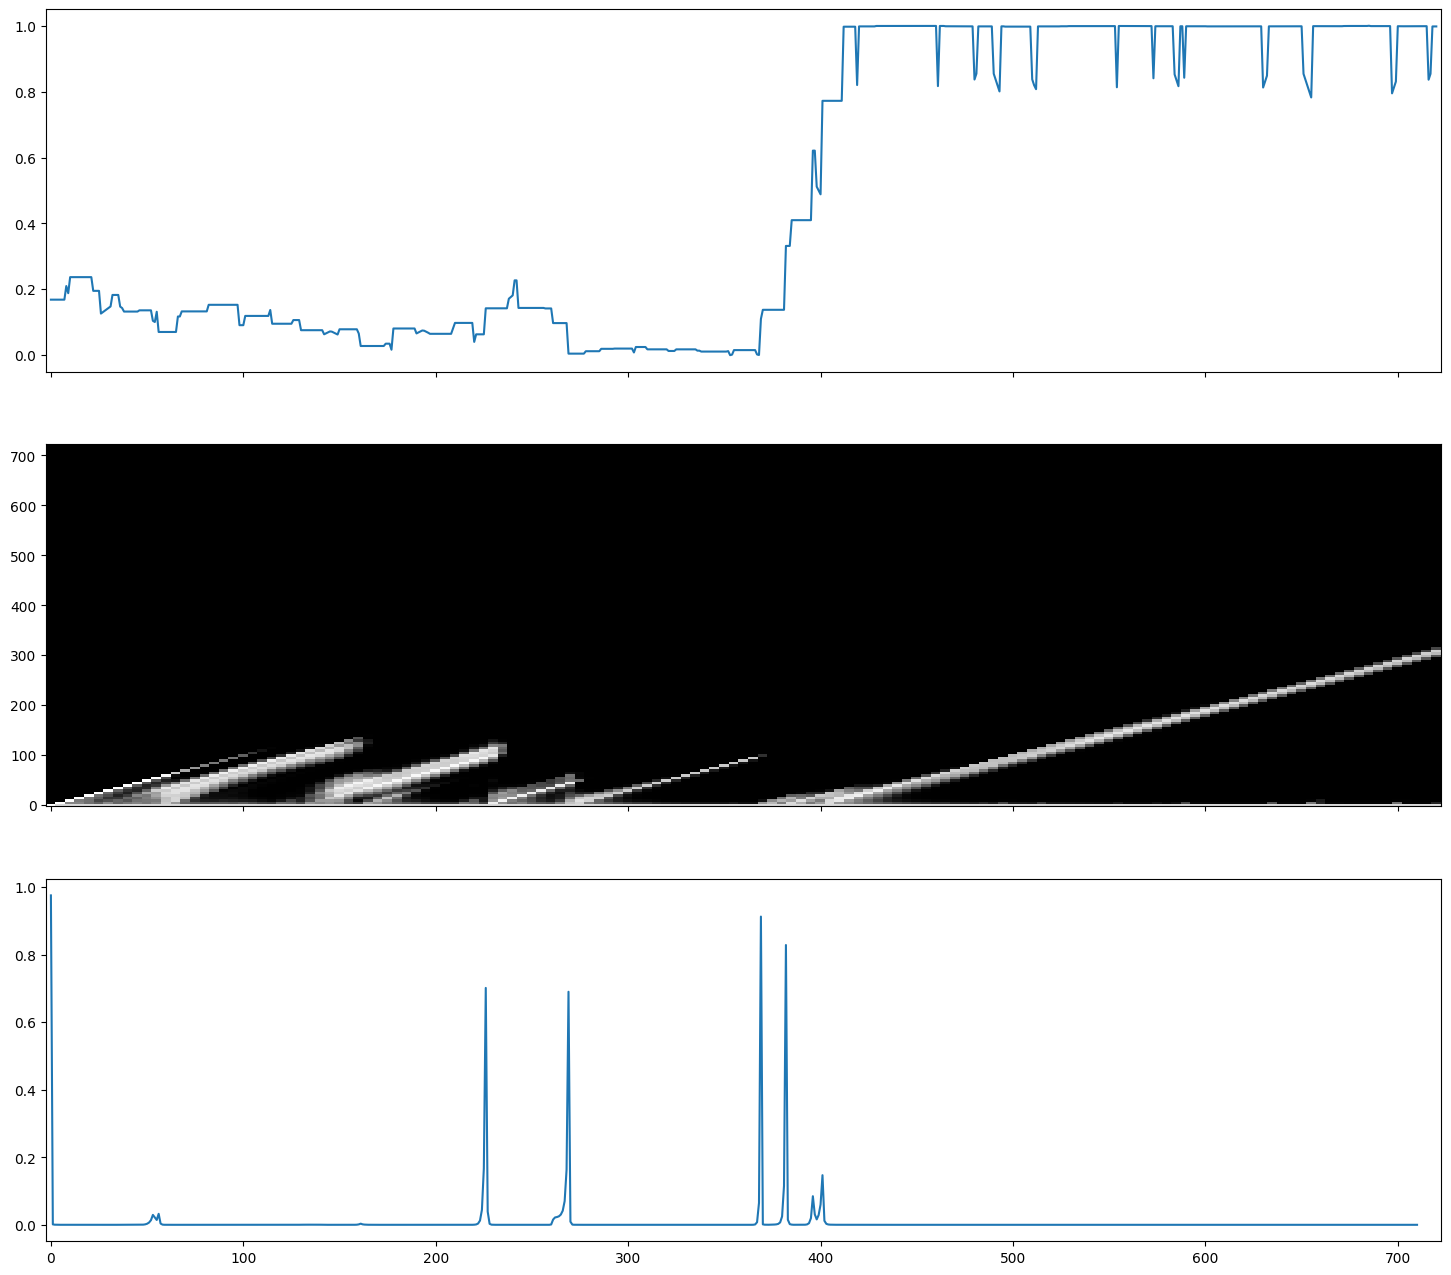

In [15]:
sparsity = 5 
epsilon = 1e-7

data_path = "../cfm/data/fse-ss/carts_cpu/1/simple_data.csv"

service_metric = basename(dirname(dirname(data_path)))
case_idx = basename(dirname(data_path))
    
    
data = pd.read_csv(data_path)   
# selected_cols = [c for c in data.columns if "latency-50" in c and 'queue-master' not in c]
# data = data[selected_cols]
data = data.fillna(method="ffill")
data = data.fillna(0)
for c in data.columns:
    data[c] = (data[c] - np.min(data[c])) / (np.max(data[c]) - np.min(data[c]))
data = data.fillna(method="ffill")
data = data.fillna(0)
    
# data['carts_cpu'].plot()
R, maxes = online_changepoint_detection(
    data['carts_cpu'],
    partial(constant_hazard, 50),
    online_ll.StudentT(alpha=0.1, beta=.01, kappa=1, mu=0)
)

fig, ax = plt.subplots(3, figsize=[18, 16], sharex=True)
ax[0].plot(data['carts_cpu'])
sparsity = 5  # only plot every fifth data for faster display
density_matrix = -np.log(R[0:-1:sparsity, 0:-1:sparsity]+epsilon)
ax[1].pcolor(np.array(range(0, len(R[:,0]), sparsity)), 
          np.array(range(0, len(R[:,0]), sparsity)), 
          density_matrix, 
          cmap=cm.Greys, vmin=0, vmax=density_matrix.max(),
            shading='auto')
Nw=10
ax[2].plot(R[Nw,Nw:-1])



In [17]:
out = R[Nw,Nw:-1].tolist()

<Axes: >

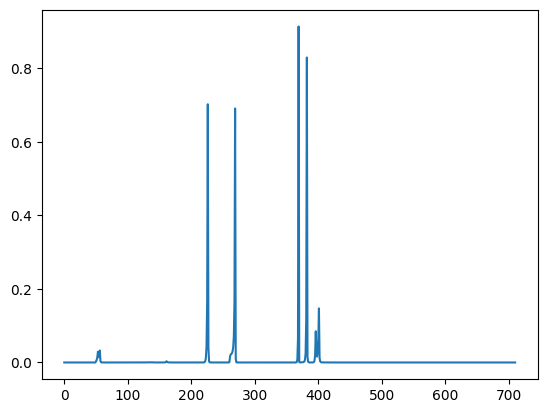

In [21]:
for i in range(50):
    out[i] = 0
    
pd.Series(out).plot()

In [22]:
max(out)

0.9130942632157585